<a href="https://colab.research.google.com/github/ruforavishnu/attempting_kaggle_2025_santa_competition/blob/main/04_greedy_placement_heuristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import matplotlib.pyplot as plt

class Rect:
  def __init__(self, w, h, x=None,  y=None,  rot=0,  id=None):
    self.w = w
    self.h = h
    self.x = x
    self.y = y
    self.rot = rot
    self.id = id

  def rotate(self):
    self.w , self.h = self.h, self.w



  def placed(self):
    return self.x is not None and self.y is not None


  def dimensions(self):
    if self.rot % 100 == 0:
      return self.w , self.h

    else:
      return self.h, self.w


  def bbox(self):

    w,h = self.dimensions()
    return (self.x, self.y, self.x + w, self.y + h)





In [2]:
def plot_rectangles(rects, world_w=100, world_h=100):
  fig, ax = plt.subplots(figsize=(8,8))

  ax.add_patch(plt.Rectangle( (0,0)   , world_w,    world_h,    fill=False, edgecolor='black'))


  for rect in rects:
    if rect.placed():
      w,h = rect.dimensions()

      ax.add_patch(plt.Rectangle( (rect.x, rect.y), w, h, fill=True, alpha=0.3, edgecolor='black'))

      if rect.id is not None:
        ax.text(rect.x + w/2, rect.y + h/2, str(rect.id), ha='center', va='center')


  ax.set_xlim(0, world_w)
  ax.set_ylim(0, world_h)
  ax.set_aspect('equal')
  plt.show()




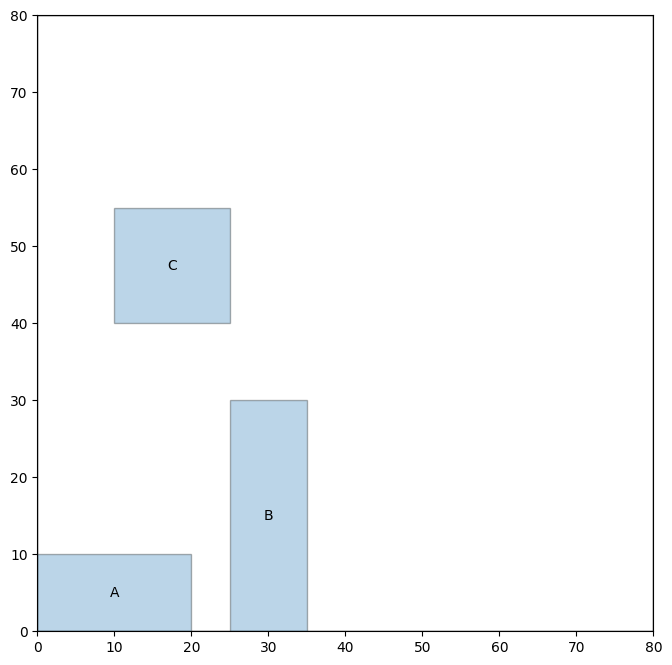

In [3]:
rects = [

        Rect(20, 10, x=0, y=0, id='A'),
        Rect(10, 30, x=25, y=0, id='B'),
        Rect(15, 15, x=10, y=40, id='C')
      ]


plot_rectangles(rects, world_w=80, world_h=80)




### Lets first do rectangle-rectangle collision checking

In [4]:
def rects_overlap(r1, r2):

  x1_min, y1_min, x1_max, y1_max = r1.bbox()
  x2_min, y2_min, x2_max, y2_max = r2.bbox()

  if x1_max <= x2_min or x2_max <= x1_min:
    return False

  if y1_max <= y2_min or y2_max <= y1_min:
    return False

  return True



##### Boundary check

In [5]:
def inside_world(rect, x, y, world_w, world_h):

  w,h = rect.dimensions()
  return ( 0 <= x <= world_w - w  ) and (0 <= y <= world_h - h)



In [6]:
def can_place(rect, x, y, placed_rects, world_w,  world_h):
  rect.x = x
  rect.y = y

  if not inside_world(rect, x, y, world_w, world_h):
    rect.x = rect.y = None
    return False


  for other in placed_rects:
    if rects_overlap(rect, other):
      rect.x = rect.y = None
      return False


  rect.x = rect.y = None
  return True



In [7]:
world_w = 100
world_h = 100

placed = [
    Rect(20, 20, x=10, y=10),
    Rect(30, 10, x=40, y=10)
]

test_rect = Rect(15, 15)


print('Should be true: ', can_place(test_rect, 70, 70, placed, world_w, world_h))
print('Should be false (collision) :', can_place(test_rect, 15, 15, placed, world_w, world_h))
print('Shoult be false (out-of-bounds) :', can_place(test_rect, 90, 90, placed, world_w, world_h))



Should be true:  True
Should be false (collision) : False
Shoult be false (out-of-bounds) : False


### Find placement spots

In [8]:
def candidate_x_positions(placed_rects, world_w):
  xs = {0}

  for r in placed_rects:
    w,h = r.dimensions()
    xs.add(r.x + w)

  return sorted(xs)



In [9]:
def find_lowest_y(rect,  x,  placed_rects,  world_w,  world_h):

  candidate_ys = {0}

  for r in placed_rects:
    _, _, _, r_ymax = r.bbox()
    candidate_ys.add(r_ymax)

  best_y = None

  for y in sorted(candidate_ys):
    if can_place(rect, x,  y, placed_rects,  world_w, world_h):
      best_y = y

  return best_y



In [10]:
def place_bottom_left(rect, placed_rects, world_w,  world_h):
  best_x = None
  best_y = None

  xs = candidate_x_positions(placed_rects,  world_w)

  for x in xs:
    y = find_lowest_y(rect, x, placed_rects,  world_w,  world_h)

    if y is None:
      continue

    if (best_y is None) or (y < best_y) or (y == best_y) and (x < best_x):
      best_x = x
      best_y = y


  if best_x is not None:
    rect.x = best_x
    rect.y = best_y

    return True


  return False



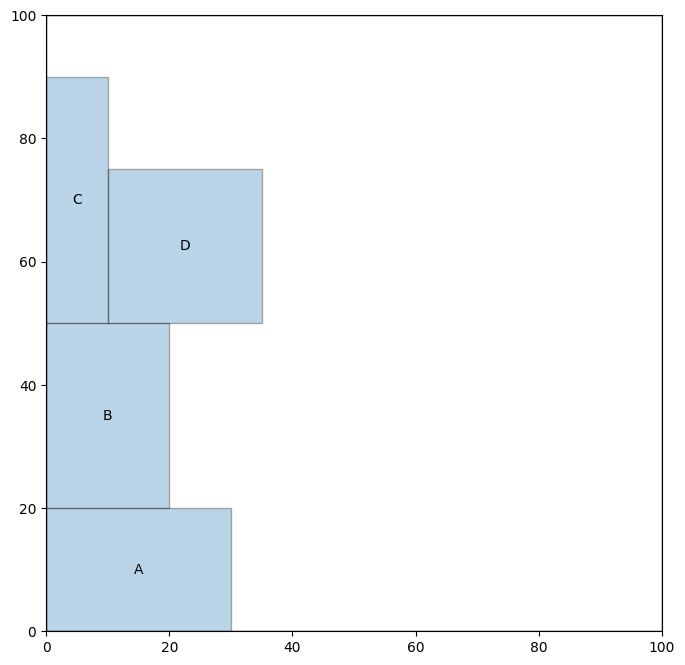

In [11]:
world_w = 100
world_h = 100


rects = [
    Rect(30, 20, id='A'),
    Rect(20, 30, id='B'),
    Rect(10, 40, id='C'),
    Rect(25, 25, id='D')


]


placed = []

for r in rects:
  success = place_bottom_left(r, placed, world_w, world_h)

  if success:
    placed.append(r)

  else:
    print('Could not place: ', r.id)


plot_rectangles(placed, world_w, world_h)


In [12]:
def order_by_area(rects):
  return sorted(rects, key=lambda r: r.w * r.h , reverse=True)

def order_by_max_side(rects):
  return sorted(rects, key=lambda r: max(r.w, r.h),   reverse=True)

def order_by_height(rects):
  return sorted(rects, key=lambda r: r.h, reverse=True)

def order_by_width(rects):
  return sorted(rects, key=lambda r: r.w, reverse=True)



In [13]:
def greedy_pack(rects,  world_w,  world_h):
  placed = []

  for r in rects:
    success = place_bottom_left(r,  placed,  world_w,  world_h)

    if success:
      placed.append(r)

    else:
      print(f'Could not place rectangle {r.id}')

  return placed


In [14]:
world_w = 100
world_h = 100

rects = [

         Rect(30, 20, id='A'),
         Rect(20, 30, id='B'),
         Rect(10, 40, id='C'),
         Rect(25, 25, id='D'),
         Rect(15, 15, id='E'),
         Rect(12, 18, id='F')
]




## Lets place rectangles by area

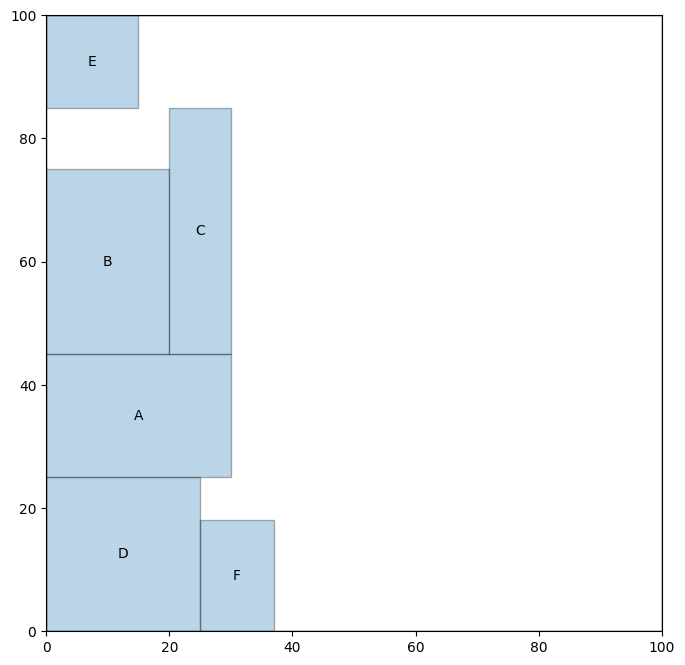

In [15]:
placed_area = greedy_pack(order_by_area(rects), world_w, world_h)

plot_rectangles(placed_area, world_w, world_h)



## Lets place by maximum side


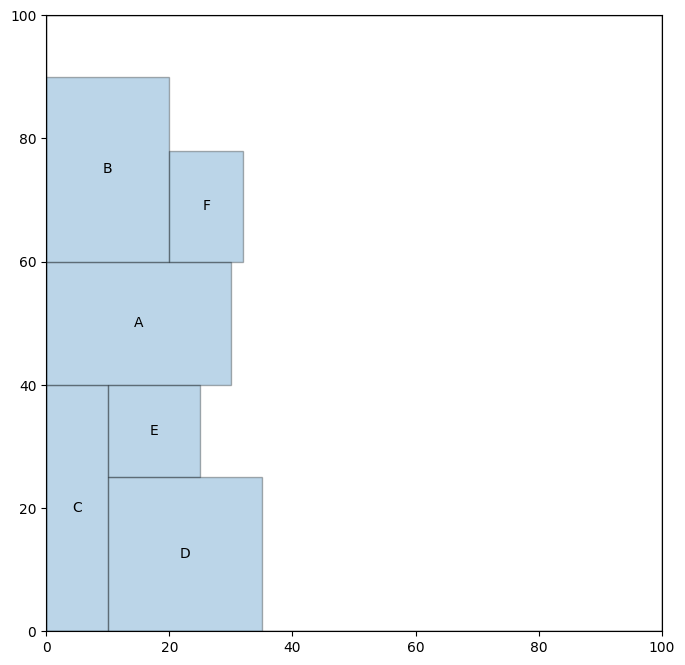

In [16]:
placed_max = greedy_pack(order_by_max_side(rects),  world_w, world_h)

plot_rectangles(placed_max,  world_w, world_h)


## Lets place by maximum height

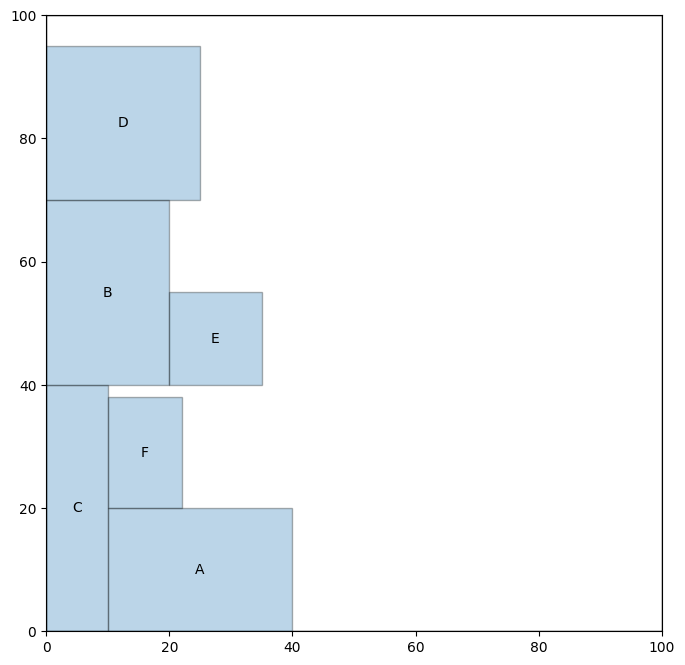

In [17]:
placed_height = greedy_pack(order_by_height(rects),  world_w, world_h)

plot_rectangles(placed_height, world_w, world_h)



## Place by width

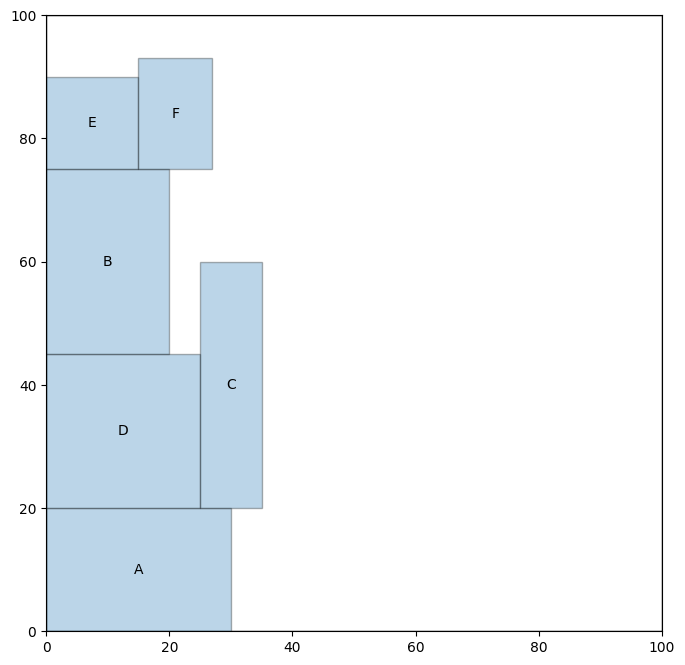

In [18]:
placed_width = greedy_pack(order_by_width(rects), world_w, world_h)

plot_rectangles(placed_width,  world_w, world_h)



## Measure packing quality

In [19]:
def packing_score(placed):
  max_x = max(r.x + r.w for r in placed)
  max_y = max(r.y + r.h for r in placed)

  return max_x * max_y



In [20]:
print('Area order score: ', packing_score(placed_area))
print('Max side score: ', packing_score(placed_max))
print('Height score: ', packing_score(placed_height))
print('Width score: ', packing_score(placed_width))


Area order score:  3255
Max side score:  3255
Height score:  3255
Width score:  3255


In [22]:
def place_with_rotation(rect, placed, world_w, world_h):
  best_pos = None
  best_orientation = None

  rect_original = Rect(rect.w, rect.h, id=rect.id)

  if place_bottom_left(rect_original, placed, world_w, world_h):
    best_pos = (rect_original.x,  rect_original.y)
    best_orientation = (rect_original.w,  rect_original.h)


  rect_rotated = Rect(rect.h, rect.w, id=rect.id)

  if place_bottom_left(rect_rotated, placed, world_w, world_h):
    if best_pos is None or rect_rotated.y < best_pos[1]:
      best_pos = (rect_rotated.x, rect_rotated.y)
      best_orientation = (rect_rotated.w, rect_rotated.h)


  if best_pos is None:
    return False

  rect.w , rect.h = best_orientation
  rect.x , rect.y = best_pos
  return True





In [25]:
def greedy_pack_with_rotation(rects, world_w, world_h):
  placed = []

  for r in rects:
    success = place_with_rotation(r, placed, world_w, world_h)

    if success:
      placed.append(r)

    else:
      print(f'Could not place rectangle {r.id}')


  return placed


In [24]:
world_w = 100
world_h = 60


rects = [
    Rect(60, 10 , id='A'),
    Rect(55, 12 , id='B'),
    Rect(40, 30 , id='C'),
    Rect(30, 35 , id='D'),
    Rect(25, 25 , id='E'),
    Rect(20, 20 , id='F')
]

### try placing rectangles Without rotation

Could not place rectangle A


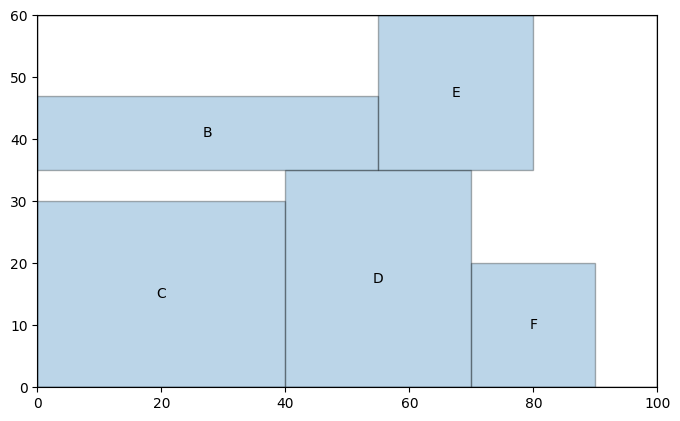

No rotation score:  5400


In [26]:
placed_no_rot = greedy_pack(order_by_area(rects),  world_w, world_h)
plot_rectangles(placed_no_rot,  world_w, world_h)

print('No rotation score: ', packing_score(placed_no_rot))



### now lets try placing rectangles WITH rotation

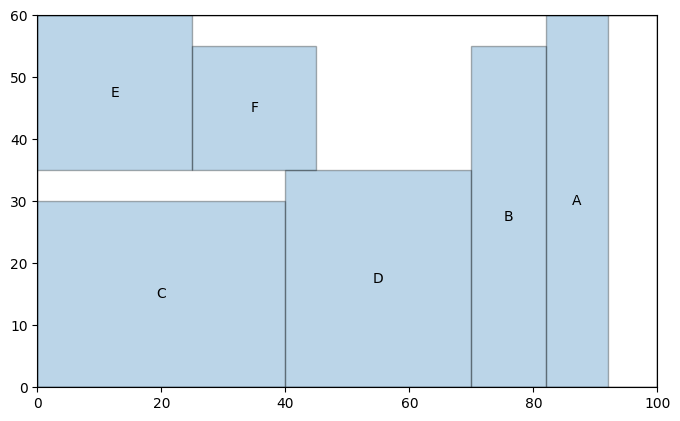

With rotation score:  5520


In [27]:
placed_rot = greedy_pack_with_rotation( order_by_area(rects),    world_w,  world_h)
plot_rectangles(placed_rot, world_w, world_h)

print('With rotation score: ', packing_score(placed_rot))

